# Map of GLM Flash count on HRRR grid
Using the HRRR 3km grid, count the number of flashes from the GLM

In [8]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v3')
from BB_HRRR.HRRR_Pando import get_hrrr_latlon, pluck_hrrr_point
from BB_GOES.get_GLM import get_GLM_files_for_range, accumulate_GLM
from BB_maps.my_basemap import draw_HRRR_map

import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12,8]
mpl.rcParams['figure.titlesize'] = 12
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 8
mpl.rcParams['ytick.labelsize'] = 8
mpl.rcParams['axes.labelsize'] = 8
mpl.rcParams['axes.titlesize'] = 10
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 7
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 300

First, get the HRRR lat/lon grid

In [2]:
LL = get_hrrr_latlon()
lat = LL['lat']
lon = LL['lon']

/uufs/chpc.utah.edu/common/home/u0553130/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
m = draw_HRRR_map()

Open a GLM file

In [10]:
sDATE = datetime(2018, 6, 8, 0, 0)
eDATE = datetime(2018, 6, 8, 1, 0)
GLM = accumulate_GLM(get_GLM_files_for_range(sDATE, eDATE))

Text(1,1,'Start: 2018-06-08 00:00:00\n End: 2018-06-08 01:00:00')

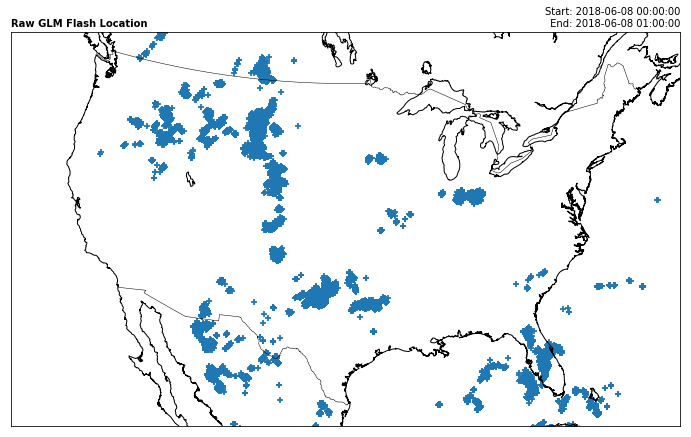

In [13]:
m.scatter(GLM['longitude'], GLM['latitude'], marker='+', latlon=True)
m.drawcountries()
m.drawcoastlines()
plt.title('Raw GLM Flash Location', loc='left', fontweight='semibold')
plt.title('Start: %s\n End: %s' % (sDATE, eDATE), loc='right')

In [170]:
H, y, x = np.histogram2d(GLM['longitude'], GLM['latitude'], bins=500)
H = np.transpose(H) # For some reason, this needs to be transposed

Y, X, = np.meshgrid(y,x) # Before 

masked = H
masked = np.ma.array(masked)
masked[masked == 0] = np.ma.masked

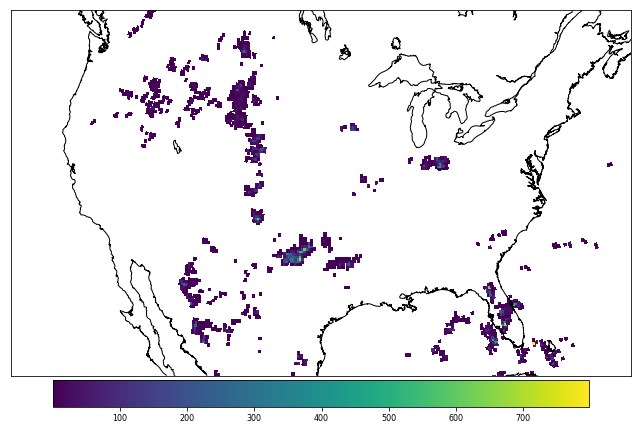

In [176]:
m.pcolormesh(Y, X, masked, latlon=True)
m.drawcoastlines()
plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)

In [173]:
from mpl_toolkits.basemap import Basemap
B = Basemap(llcrnrlon=-140, llcrnrlat=-50, urcrnrlon=-20, urcrnrlat=60)

Text(0.5,1,'Raw Flashes')

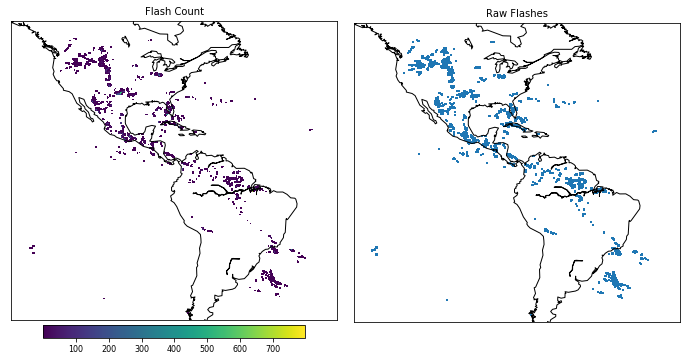

In [174]:
fig, [ax1, ax2] = plt.subplots(1,2)

plt.sca(ax1)
B.pcolormesh(Y, X, masked, latlon=True)
B.drawcoastlines()
plt.colorbar(orientation='horizontal', pad=.01, shrink=.8)
plt.title('Flash Count')

plt.sca(ax2)
B.scatter(GLM['longitude'], GLM['latitude'], marker= '+', s=3, latlon=True)
B.drawcoastlines()
plt.title('Raw Flashes')

Text(0.5,1,'Raw Flashes')

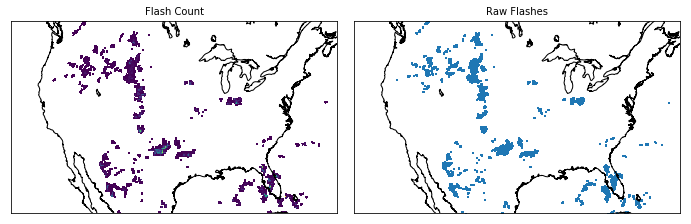

In [175]:
fig, [ax1, ax2] = plt.subplots(1,2)

plt.sca(ax1)
m.pcolormesh(Y, X, masked, latlon=True)
m.drawcoastlines()
plt.title('Flash Count')

plt.sca(ax2)
m.scatter(GLM['longitude'], GLM['latitude'], marker= '+', s=3, latlon=True)
m.drawcoastlines()
plt.title('Raw Flashes')

In [167]:
np.shape(y)

(501,)